# Figure out how to use python to blend a bunch of images (HD version)

See StackOverflow question [29106702](https://stackoverflow.com/questions/29106702/blend-overlapping-images-in-python)

In [1]:
from PIL import Image
from IPython.display import display

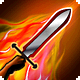

In [3]:
img1 = Image.open('../icons_hd/action_icons/GLA/9.png')
img1

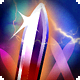

In [4]:
img2 = Image.open('../icons_hd/action_icons/GLA/15.png')
img2

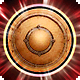

In [5]:
img3 = Image.open('../icons_hd/action_icons/GLA/16.png')
img3

In [8]:
print(img1.format, img1.size, img1.mode)

PNG (80, 80) RGBA


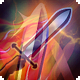

In [9]:
img12 = Image.blend(img1, img2, 1/2)
img12

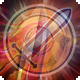

In [10]:
img123 = Image.blend(img12, img3, 1/3)
img123

## Try this with all GLA images
Can blend 2 at a time, reblending previously blended image as long as we weight the blending in the right way. Specifically, can set the weight fraction to 1 / n for the nth blended image.

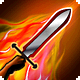

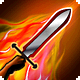

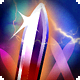

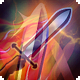

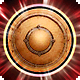

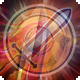

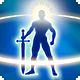

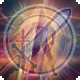

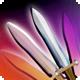

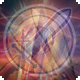

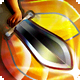

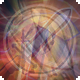

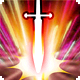

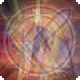

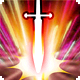

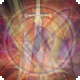

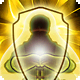

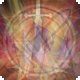

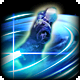

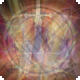

In [12]:
blended_image = None
for i, img_id in enumerate([9, 15, 16, 17, 20, 21, 23, 23, 28, 7381]):
    img_uri = f'../icons_hd/action_icons/GLA/{img_id}.png'
    img = Image.open(img_uri)
    if not blended_image:
        blended_image = img
    else:
        blended_image = Image.blend(blended_image, img, 1 / (i + 1))
    display(img, blended_image)
    print('\n')

### Try blending the images in reverse order, image should be same

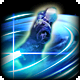

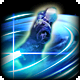

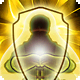

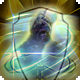

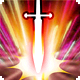

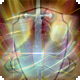

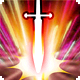

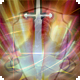

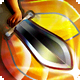

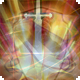

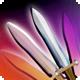

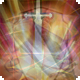

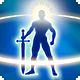

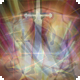

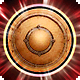

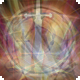

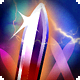

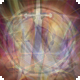

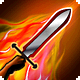

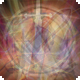

In [13]:
blended_image2 = None
for i, img_id in enumerate([9, 15, 16, 17, 20, 21, 23, 23, 28, 7381][::-1]):
    img_uri = f'../icons_hd/action_icons/GLA/{img_id}.png'
    img = Image.open(img_uri)
    if not blended_image2:
        blended_image2 = img
    else:
        blended_image2 = Image.blend(blended_image2, img, 1 / (i + 1))
    display(img, blended_image2)
    print('\n')

## Check

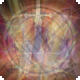

In [14]:
blended_image

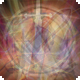

In [15]:
blended_image2

## Looks the same to me!

## What if we layer class job icon on top of blended image?

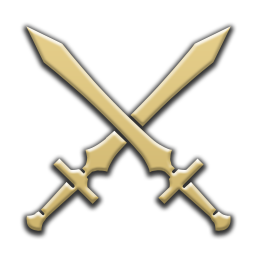

In [16]:
cj_icon = Image.open('../icons_hd/class_job_icons/GLA.png')
cj_icon

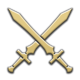

In [17]:
# First make same size as blended image
cj_icon = cj_icon.resize((80, 80))
cj_icon

In [18]:
blended_image.paste(cj_icon, (0, 0), cj_icon)

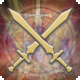

In [19]:
blended_image